# Question 1

This script visualises examples of the five zero patterns of a real-valued linear phase FIR filter.

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.patches import Circle
from numpy import cos as c
from numpy import sin as s

from a2_config import A2_ROOT, SAVEFIG_CONFIG

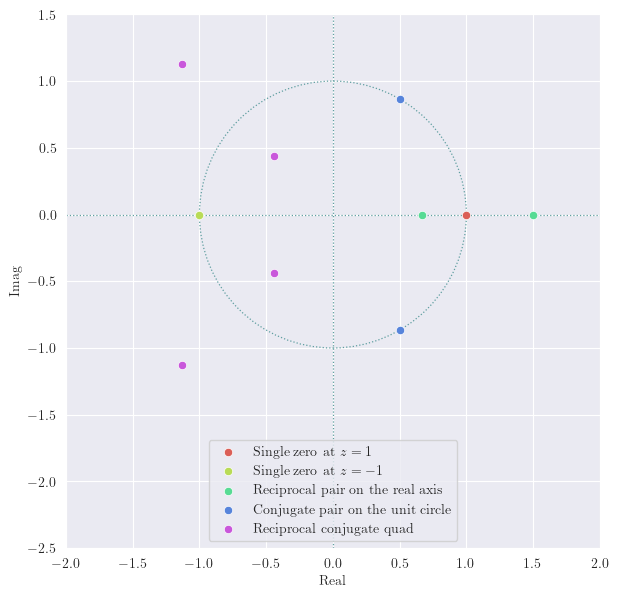

In [3]:
palette = sns.color_palette("hls", n_colors=5)

fig, ax = plt.subplots(figsize=(6, 6))
fig.tight_layout()

# Plot the various zero pattern examples
sns.scatterplot(x=[1], y=[0], ax=ax, color=palette[0], zorder=2,
    label="Single zero at $z=1$")

sns.scatterplot(x=[-1], y=[0], ax=ax, color=palette[1], zorder=2,
    label="Single zero at $z=-1$")

sns.scatterplot(x=[1.5, 1/1.5], y=[0, 0], ax=ax, color=palette[2], zorder=2,
    label="Reciprocal pair on the real axis")

arg = np.pi / 3
sns.scatterplot(x=c([arg, arg]), y=s([-arg, arg]), ax=ax, 
    color=palette[3], zorder=2, label="Conjugate pair on the unit circle")

mag = 1.6
arg = 3 * np.pi / 4
real = [c(arg) / mag, c(arg) / mag, mag * c(arg), mag * c(arg)]
imag = [-s(arg) / mag, s(arg) / mag, -mag * s(arg), mag * s(arg)]
sns.scatterplot(x=real, y=imag, ax=ax, color=palette[4],  zorder=2,
    label="Reciprocal conjugate quad")

# Configure the plot
ax.set_xlabel("Real")
ax.set_ylabel("Imag")
ax.set_aspect("equal")
ax.set_xlim([-2.0, 2.0])
ax.set_ylim([-2.5, 1.5])
ax.legend(loc="lower center")

# Draw the unit circle and axes as an underlay
underlay_style = {"ls": "dotted", "lw": 0.9, "color": "cadetblue", "zorder": 1}
unit_circle = Circle(xy=(0, 0), radius=1, fill=False, **underlay_style)
ax.add_patch(unit_circle)
ax.axhline(0, **underlay_style)
ax.axvline(0, **underlay_style)

fname = Path(A2_ROOT, "output", "q1_zero_patterns.png")
fig.savefig(fname, **SAVEFIG_CONFIG)